In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv('/Users/srinivaspadhy/Desktop/DS_PW_Skills/Internship Projects/adult_census/artifacts/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.shape

(32561, 15)

In [11]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
(df['workclass'].value_counts()/df.shape[0])*100
# Percentage of records with ?, to analyse whether to drop them or not

workclass
Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: count, dtype: float64

In [14]:
df['workclass'] = df['workclass'].str.replace(' ','')

In [28]:
df['workclass'].replace('?',np.nan,inplace=True)



/var/folders/2c/g3p163nx0ydgv0kwy75swnb80000gn/T/ipykernel_84554/1689958868.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace('?',np.nan,inplace=True)


In [18]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [19]:
df['occupation'] = df['occupation'].str.replace(" ",'')

In [20]:
df['occupation'].replace('?',np.nan,inplace=True)

/var/folders/2c/g3p163nx0ydgv0kwy75swnb80000gn/T/ipykernel_84554/2029298347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].replace('?',np.nan,inplace=True)


In [21]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [22]:
df['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [23]:
df['country'] = df['country'].str.replace(' ','')
df['country'].replace('?',np.nan,inplace=True)

/var/folders/2c/g3p163nx0ydgv0kwy75swnb80000gn/T/ipykernel_84554/112056771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace('?',np.nan,inplace=True)


In [29]:
df['country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [30]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [31]:
df['education'] = df['education'].str.replace(' ','')

In [32]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [33]:
df['marital-status'] = df['marital-status'].str.replace(' ','')


In [34]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [35]:
df['relationship'] = df['relationship'].str.replace(' ','')

In [36]:
df['race'] = df['race'].str.replace(" ",'')
df['sex'] = df['sex'].str.replace(" ",'')
df['salary'] = df['salary'].str.replace(" ","")

In [37]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [38]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [39]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [40]:
df['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [41]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: xlabel='age', ylabel='Count'>

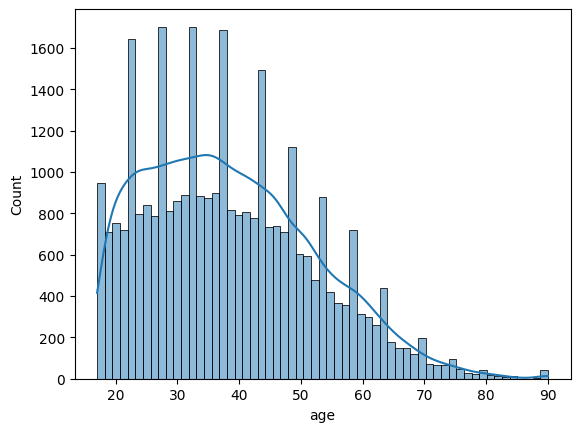

In [42]:
sns.histplot(data=df,x='age',kde=True)

<Axes: xlabel='workclass', ylabel='count'>

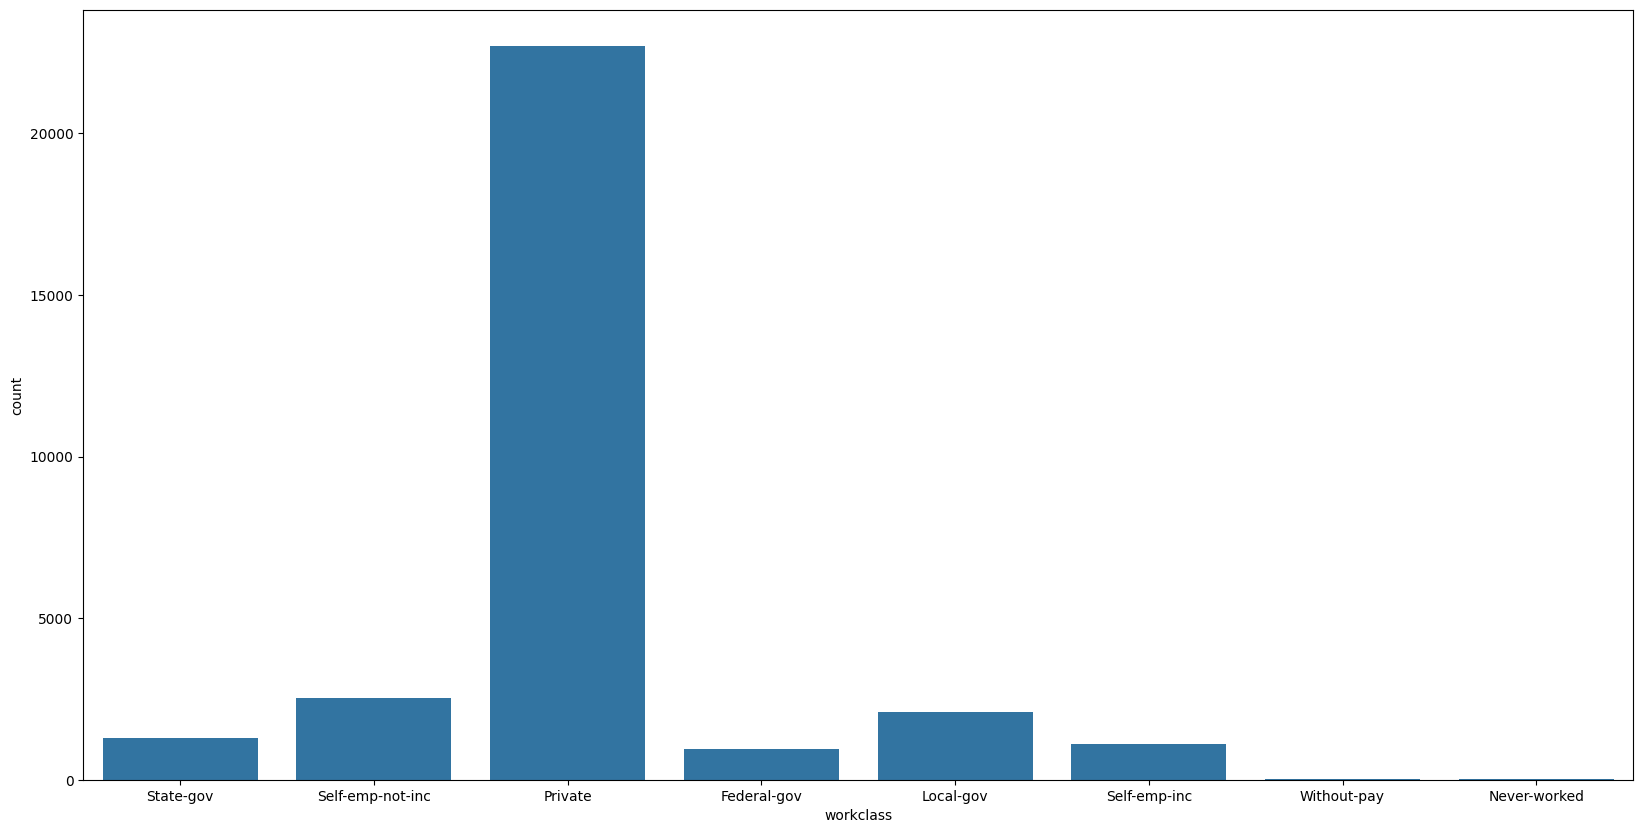

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='workclass')

<Axes: xlabel='fnlwgt', ylabel='Count'>

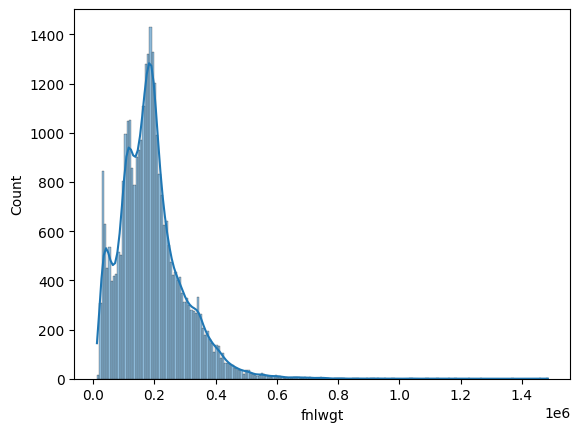

In [44]:
sns.histplot(data=df,x='fnlwgt',kde=True)

<Axes: xlabel='count', ylabel='education'>

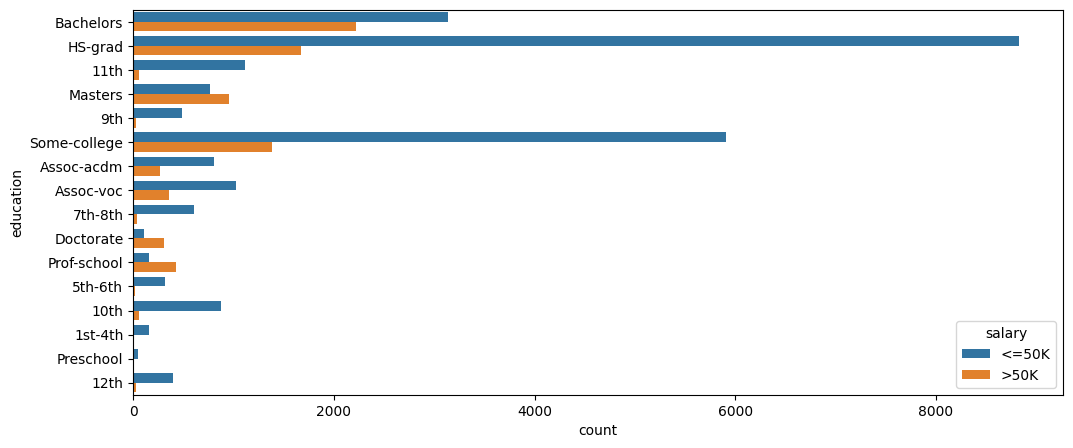

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,y='education',hue='salary',orient='h')
# Level of higher education increases the salary above 50K (Masters and Doctorate, Prof School)

<Axes: xlabel='education-num', ylabel='count'>

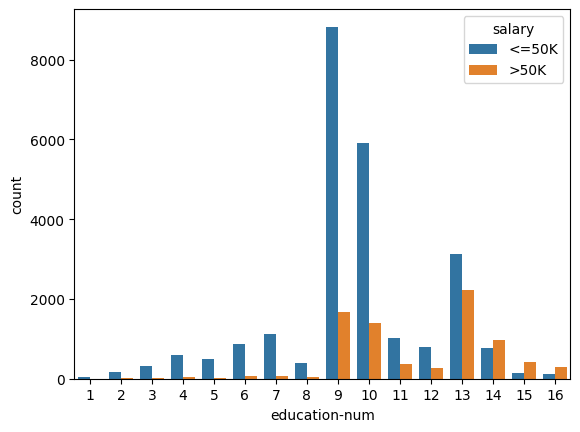

In [47]:
sns.countplot(data=df,x='education-num',hue='salary')
# Number of education greater than 9 has more counts of salary while number of education 
# more than 14 has count of salary  >50k more than the count of people having salary <=50k 

<Axes: xlabel='count', ylabel='occupation'>

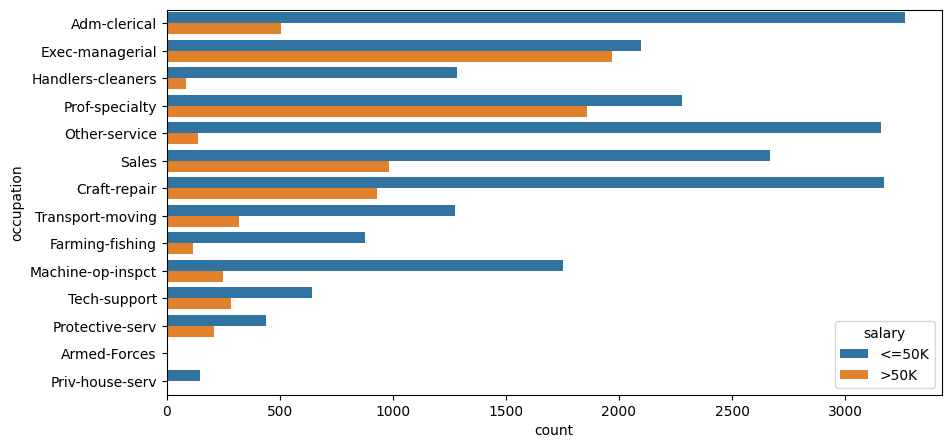

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='occupation',hue='salary',orient='h')
# Exec managerial occupation has highest count of salary >50k of all occupation with salary >50k
# Adm-clerical has highest count of salary <=50k of all occupation with salary <=50k

<Axes: xlabel='sex', ylabel='count'>

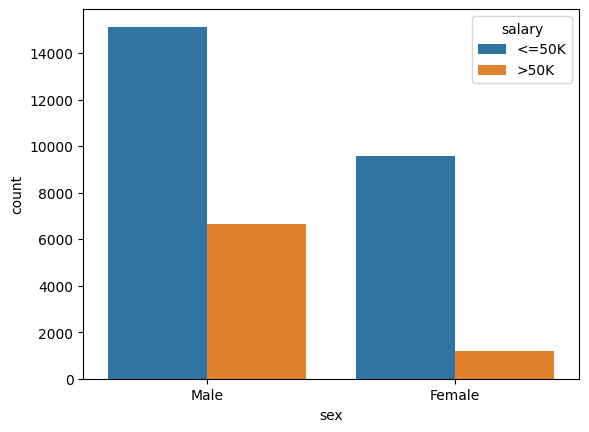

In [49]:
sns.countplot(data=df,x='sex',hue='salary')

<Axes: xlabel='salary', ylabel='capital-gain'>

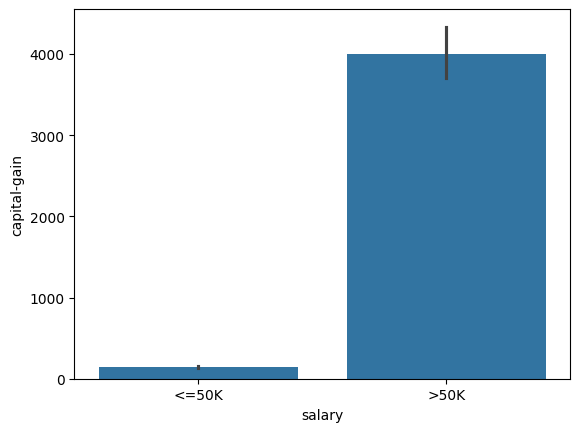

In [50]:
sns.barplot(data=df,x='salary',y='capital-gain')
# Average capital gain is high with sarary >50k

<Axes: xlabel='capital-gain', ylabel='occupation'>

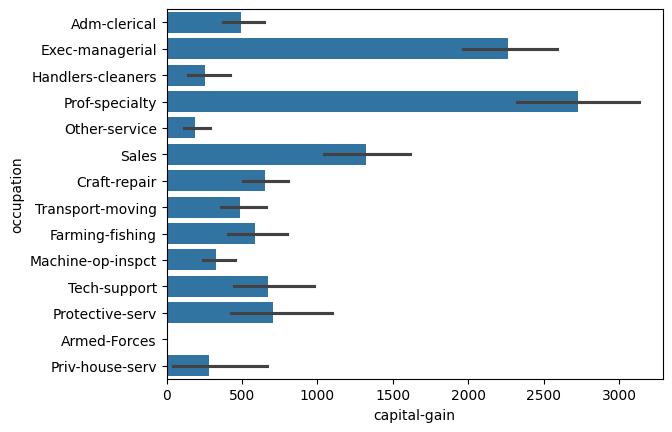

In [51]:
sns.barplot(data=df,y='occupation',x='capital-gain',orient='h')
# Prof specialty and exec managerial post has the 1st and 2nd highest average capital gain

<Axes: xlabel='salary', ylabel='hours-per-week'>

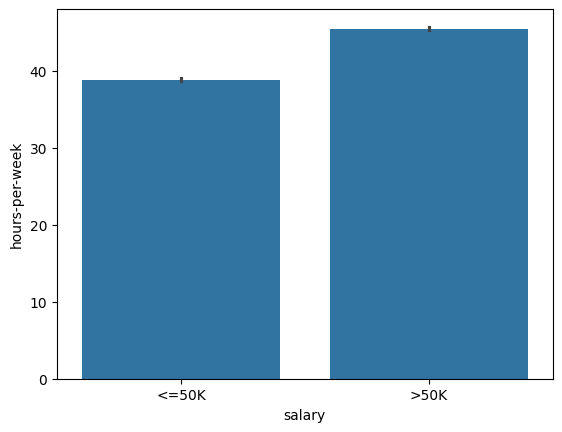

In [52]:
sns.barplot(data=df,x='salary',y='hours-per-week')
# Average working hours per week is higher for the people having salary >50k

In [53]:
cat_col = []
for col in df.columns:
    if df[col].dtypes == 'object':
        cat_col.append(col)        
print(cat_col)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country', 'salary']


In [54]:
num_col = []
for col in df.columns:
    if df[col].dtypes != 'object':
        num_col.append(col)       
print(num_col)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


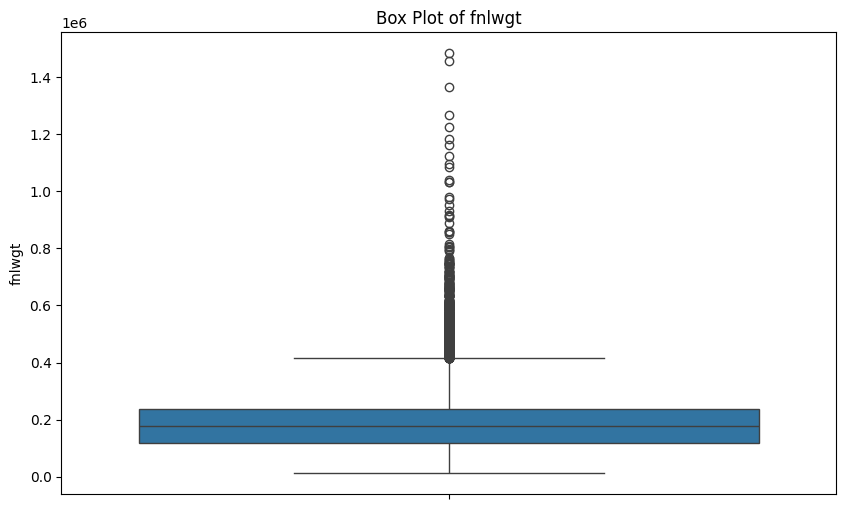

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['fnlwgt'])
plt.title('Box Plot of fnlwgt')
plt.ylabel('fnlwgt')
plt.show()

<Axes: ylabel='fnlwgt'>

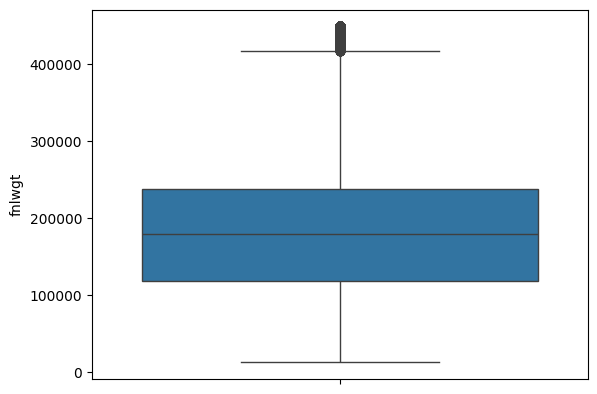

In [56]:
# lower_bound = df['fnlwgt'].quantile(0.02)
upper_bound = df['fnlwgt'].quantile(0.98)

df_copy = df.copy()
df_copy['fnlwgt'] = np.where(df_copy['fnlwgt']>upper_bound,upper_bound,
                             df_copy['fnlwgt'])
sns.boxplot(y=df_copy['fnlwgt'])

In [57]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
upper_bound = q3+1.5*iqr
lower_bound = q1-1.5*iqr

def cap_age_outliers(age):
    if age < lower_bound:
        return lower_bound
    elif age > upper_bound:
        return upper_bound
    else:
        return age

In [58]:


df_copy['age'] = df_copy['age'].apply(cap_age_outliers)

<Axes: ylabel='age'>

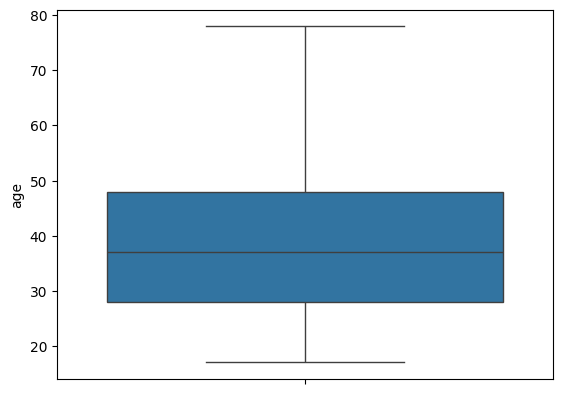

In [59]:
sns.boxplot(y=df_copy['age'])

In [60]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39.0,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: ylabel='hours-per-week'>

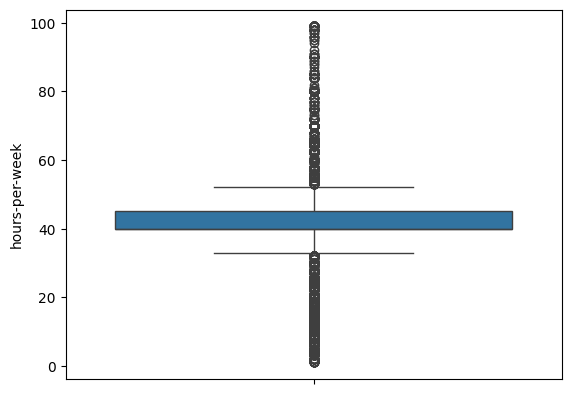

In [61]:
sns.boxplot(y=df_copy['hours-per-week'])

<Axes: ylabel='hours-per-week'>

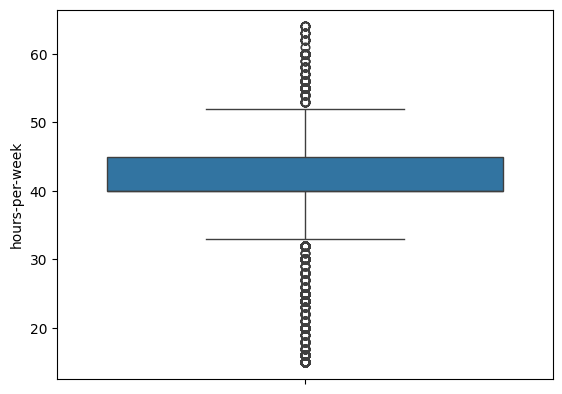

In [62]:
upper_bound = df_copy['hours-per-week'].quantile(0.97)
lower_bound = df_copy['hours-per-week'].quantile(0.03)

df_copy['hours-per-week'] = np.where(df_copy['hours-per-week']<lower_bound,lower_bound,
                                    np.where(df_copy['hours-per-week']>upper_bound,upper_bound,df_copy['hours-per-week']))
df_copy = df_copy[(df_copy['hours-per-week']<upper_bound) & (df_copy['hours-per-week']>lower_bound)]
df_copy['hours-per-week'] = np.where(df_copy['hours-per-week']<lower_bound,lower_bound,
                                    np.where(df_copy['hours-per-week']>upper_bound,upper_bound,df_copy['hours-per-week']))
sns.boxplot(y=df_copy['hours-per-week'])

In [63]:
df_copy.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [64]:
df_copy['occupation'].unique()

array(['Adm-clerical', 'Handlers-cleaners', 'Prof-specialty',
       'Exec-managerial', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

<Axes: xlabel='occupation', ylabel='count'>

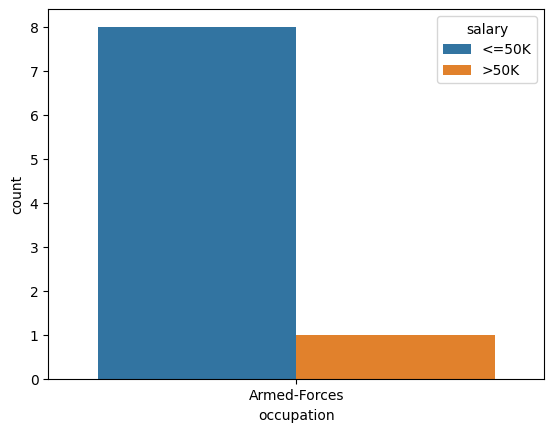

In [65]:
sns.countplot(data=df[df['occupation']=='Armed-Forces'],x='occupation',hue='salary')

In [66]:
cat_cols = []
for col in df_copy.columns:
    if (df_copy[col].dtype == 'object') & (col != 'salary'):
        cat_cols.append(col)
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

In [67]:
# cat_cols.remove('occupation')
cat_cols.remove('occupation')
cat_cols

['workclass',
 'education',
 'marital-status',
 'relationship',
 'race',
 'sex',
 'country']

In [68]:
num_cols = []
for col in df_copy.columns:
    if df_copy[col].dtype != 'object':
        num_cols.append(col)
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [69]:
df_copy['occupation'].unique()

array(['Adm-clerical', 'Handlers-cleaners', 'Prof-specialty',
       'Exec-managerial', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [90]:
X = df_copy.drop(columns=['salary'],axis=1)
y = df_copy['salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=48)
X_train
# y_train = y_train.values.reshape(-1, 1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
3856,22.0,Private,129934.0,Some-college,10,Never-married,Adm-clerical,Not-in-family,Asian-Pac-Islander,Male,0,0,40.0,NaN
25732,64.0,Private,98586.0,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60.0,United-States
15176,74.0,NaN,292627.0,1st-4th,2,Married-civ-spouse,NaN,Husband,Black,Male,0,0,40.0,United-States
302,31.0,Private,217460.0,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45.0,United-States
2110,30.0,Private,203277.0,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,60.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,24.0,Private,420779.0,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,35.0,United-States
32160,23.0,Private,122272.0,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,20.0,United-States
10194,19.0,Private,299598.0,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,16.0,United-States
2781,61.0,Private,183735.0,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45.0,United-States


In [83]:
y_train

3856     <=50K
25732     >50K
15176    <=50K
302       >50K
2110      >50K
         ...  
11295    <=50K
32160    <=50K
10194    <=50K
2781      >50K
16909     >50K
Name: salary, Length: 21362, dtype: object

In [108]:



X = df_copy.drop(columns=['salary'],axis=1)
y = df_copy['salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)
# y_train = y_train.values.reshape(-1, 1)

num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

occupation_categories = ['Exec-managerial','Prof-specialty','Sales','Craft-repair','Adm-clerical','Transport-moving','Tech-support',
                        'Machine-op-inspct','Protective-serv','Farming-fishing','Handlers-cleaners','Other-service','Priv-house-serv','Armed-Forces']

cat_pipeline_ordinal = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinal_encoder',OrdinalEncoder(categories=[occupation_categories]))
    ]
)

cat_pipeline_oh = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('oh_encoder',OneHotEncoder(sparse_output=False))
    ]
)

preprocessor = ColumnTransformer([
        ('num_pipeline',num_pipeline,num_cols),
        ('cat_pipeline_ordinal',cat_pipeline_ordinal,['occupation']),
        ('cat_pipeline_oh',cat_pipeline_oh,cat_cols)
])

input_feature_train_arr = preprocessor.fit_transform(X_train)
input_feature_test_arr = preprocessor.transform(X_test)
# print(input_feature_train_arr.ndim)
# print(y_train.ndim)

In [109]:
oh = OneHotEncoder(sparse_output=False,drop='first')

y_train_encoded = oh.fit_transform(y_train.values.reshape(-1,1))

y_test_encoded = oh.fit_transform(y_test.values.reshape(-1,1))

In [110]:
y_train_encoded 

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [111]:
train_arr = np.c_[input_feature_train_arr,y_train_encoded]
test_arr = np.c_[input_feature_test_arr,y_test_encoded]

train_df = pd.DataFrame(train_arr)
train_df


,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.345297,-0.823296,-0.034581,-0.146739,-0.215985,1.061727,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.033379,1.295612,-0.425024,-0.146739,-0.215985,-0.251663,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.042356,-0.351222,-0.425024,1.116993,-0.215985,1.061727,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.421032,-0.397401,-0.425024,-0.146739,-0.215985,-0.032765,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.093673,0.885957,-0.034581,-0.146739,-0.215985,-2.221749,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21357,-1.623820,-0.743946,-1.205910,-0.146739,4.109107,-2.440647,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21358,-1.396615,-0.732158,-0.034581,-0.146739,-0.215985,-0.032765,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21359,0.193827,0.328737,-0.425024,-0.146739,-0.215985,-0.032765,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21360,-1.017938,2.126731,-0.034581,-0.146739,-0.215985,-0.032765,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report

In [118]:
models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC(kernel='rbf'),    
    'RandomForestClassifier':RandomForestClassifier(),
    'NaiveBayesClassifier':GaussianNB(),
    'XGBoostClassifier':XGBClassifier()
}

In [119]:
X_train,y_train,X_test,y_test = (
    train_arr[:,:-1],
    train_arr[:,-1],
    test_arr[:,:-1],
    test_arr[:,-1]
)

report = {}
for key_index,model in enumerate(models.values()):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    report[list(models.keys())[key_index]] = accuracy_score(y_test,y_pred)
       
print(report)


{'LogisticRegression': 0.8517911751856706, 'DecisionTreeClassifier': 0.8128003494975972, 'SVC': 0.8499344692005243, 'RandomForestClassifier': 0.851135867190913, 'NaiveBayesClassifier': 0.5370249017038008, 'XGBoostClassifier': 0.8671909130624726}
